In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy import stats


In [2]:
df = pd.read_csv("/Users/ranja/Downloads/wind_Energy.csv", sep='\t', header=None)
df.columns = ["Date", "Speed(m/s)", "Direction(°)", "Energy(kWh)"]
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.set_index("Date", inplace=True)


In [3]:
# Convert numerical columns
def to_numeric(x):
    x = str(x).replace(',', '.')
    return pd.to_numeric(x, errors='coerce')

df["Speed(m/s)"] = df["Speed(m/s)"].apply(to_numeric)
df["Direction(°)"] = df["Direction(°)"].apply(to_numeric)
df["Energy(MWh)"] = df["Energy(kWh)"].apply(to_numeric) / 1000
df.drop(columns=["Energy(kWh)"], inplace=True)


In [4]:
# 1. IQR Method
def detect_anomalies_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

iqr_anomalies = detect_anomalies_iqr(df, "Energy(MWh)")

In [16]:
# 2. Isolation Forest
#def detect_anomalies_isolation_forest(df, column, contamination=0.01):
#    model = IsolationForest(contamination=contamination, random_state=42)
#    df["anomaly"] = model.fit_predict(df[[column]])
#    return df[df["anomaly"] == -1]

#iso_anomalies = detect_anomalies_isolation_forest(df, "Energy(MWh)")

NameError: name 'iso_anomalies' is not defined

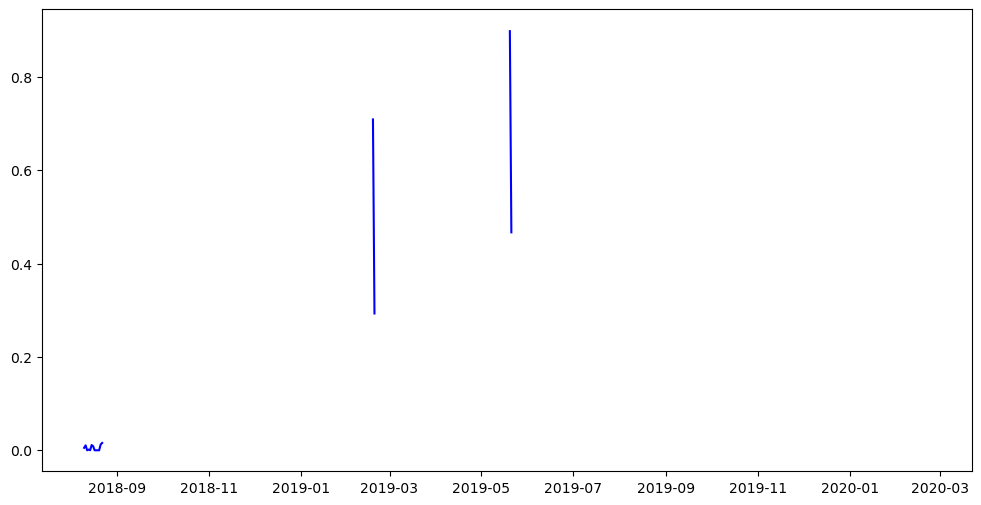

In [14]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Energy(MWh)"], label="Energy Data", color='blue')
plt.scatter(iqr_anomalies.index, iqr_anomalies["Energy(MWh)"], color='red', label='IQR Anomalies')
plt.scatter(iso_anomalies.index, iso_anomalies["Energy(MWh)"], color='orange', label='Isolation Forest Anomalies')
plt.legend()
plt.title("Anomaly Detection in Energy Generation")
plt.show()


In [15]:
# Remove anomalies
df_clean = df[~df.index.isin(iqr_anomalies.index)]

# Ready for Forecasting
df_clean.drop(columns=["anomaly"], errors='ignore', inplace=True)
print("Cleaned dataset ready for forecasting.")

Cleaned dataset ready for forecasting.
